# Estudo dos deputados e susa proposições junto a câmara

O estudo engloba somente alguns tipos de proposições (PL, PLP, PEC, PLV, PDC, MPV), feitas desde 01/01/1984 de todos que já foram deputados desde 1983

In [1]:
import numpy as np
import pandas as pd
import gzip
import io
import requests

PANDA_VERSION = pd.__version__
PROPOSICAO_JSON_DS_FILE = 'https://github.com/bozoh/meu-legislador/raw/master/data/ds/proposicoes.json.gz'
DEPUTADOS_JSON_DS_FILE = 'https://github.com/bozoh/meu-legislador/raw/master/data/ds/deputados.json.gz'

In [2]:
PANDA_VERSION

'0.22.0'

Carregando os dados de todas as proposições (PL, PLP, PEC, PLV, PDC, MPV) da câmara dos deputados 
a partit de 1/1/1984


In [3]:
web_response = requests.get(PROPOSICAO_JSON_DS_FILE, timeout=30, stream=True)
f = io.BytesIO(web_response.content)

with gzip.GzipFile(fileobj=f) as fh:
    df_prep = pd.read_json(fh, orient='split')

Carregando dados dos depudados

In [4]:
web_response = requests.get(DEPUTADOS_JSON_DS_FILE, timeout=30, stream=True)
f = io.BytesIO(web_response.content)

with gzip.GzipFile(fileobj=f) as fh:
    df_dep = pd.read_json(fh, orient='split')

Nesse estudo só quero o nome dos deputados

In [5]:
df_dep = df_dep[['id', 'nomeCivil']]
df_dep.head()

,id,nomeCivil
0,65551,RICARDO WAGNER DE CARVALHO LAGO
1,139285,LÍDICE DA MATA E SOUZA
2,73761,NELSON TRAD
3,73764,ABELARDO LUIZ LUPION MELLO
4,73765,AFFONSO ALVES DE CAMARGO NETO


Acrescentando a coluna idAutor, obtido pela coluna uriAutores, que no final tem o id do deputado

In [6]:
df_prep['idAutor'] = df_prep.uriAutores.map(lambda x: int(x.replace('https://dadosabertos.camara.leg.br/api/v2/deputados/','')) if x else np.nan)

Acrescentando o nome do autor nas proposições

In [7]:
df_prep=pd.merge(left=df_prep, right=df_dep, left_on='idAutor', right_on='id')
df_prep.head()

,ano,dataApresentacao,descricaoTipo,ementa,ementaDetalhada,id_x,idTipo,idTipoAutor,justificativa,keywords,...,uriOrgaoNumerador,uriPropAnterior,uriPropPosterior,uriPropPrincipal,uriUltimoRelator,urlInteiroTeor,urnFinal,idAutor,id_y,nomeCivil
0,2011,2011-10-19T21:21,Projeto de Lei,"Altera a Lei nº 9.503, de 23 de setembro de 19...",NaN,524290,139,10000,NaN,"Alteração, Código de Trânsito Brasileiro, util...",...,NaN,NaN,NaN,https://dadosabertos.camara.leg.br/api/v2/prop...,NaN,http://www.camara.gov.br/proposicoesWeb/prop_m...,NaN,160593,160593,PAULO WAGNER LEITE DANTAS
1,2011,2011-10-19T21:22,Projeto de Lei,Institui a meia-entrada para doadores de sangu...,NaN,524291,139,10000,NaN,"Concessão, doador, sangue, medula óssea, meia-...",...,NaN,NaN,NaN,https://dadosabertos.camara.leg.br/api/v2/prop...,NaN,http://www.camara.gov.br/proposicoesWeb/prop_m...,NaN,160593,160593,PAULO WAGNER LEITE DANTAS
2,2011,2011-11-30T19:51,Projeto de Lei,Denomina Dona Militana o aeroporto construído ...,NaN,529389,139,10000,NaN,"Denominação, aeroporto, São Gonçalo do Amarant...",...,NaN,NaN,NaN,None,NaN,http://www.camara.gov.br/proposicoesWeb/prop_m...,NaN,160593,160593,PAULO WAGNER LEITE DANTAS
3,2011,2011-11-30T19:52,Projeto de Lei,"Altera a Lei nº 9.503, de 23 de setembro de 19...",NaN,529393,139,10000,NaN,"Alteração, Código de Trânsito Brasileiro, fixa...",...,NaN,NaN,NaN,None,NaN,http://www.camara.gov.br/proposicoesWeb/prop_m...,NaN,160593,160593,PAULO WAGNER LEITE DANTAS
4,2013,2013-03-20T17:50,Projeto de Lei,Obriga os mercados e supermercados a oferecere...,NaN,568467,139,10000,NaN,"Obrigatoriedade, mercado, supermercado, gratui...",...,NaN,NaN,NaN,https://dadosabertos.camara.leg.br/api/v2/prop...,NaN,http://www.camara.gov.br/proposicoesWeb/prop_m...,NaN,160593,160593,PAULO WAGNER LEITE DANTAS


Somando a quantidade de proposições por deputado

In [8]:
df_prep.nomeCivil.value_counts()

CARLOS FREDERICO THEODORO NADER                  647
CARLOS GOMES BEZERRA                             546
ANTONIO CARLOS DE MENDES THAME                   468
DARCI POMPEO DE MATTOS                           436
JOÃO ALBERTO FRAGA SILVA                         417
INOCÊNCIO GOMES DE OLIVEIRA                      393
ENIO EGON BERGMANN BACCI                         387
RÔMULO JOSÉ DE GOUVEIA                           306
CLEBER VERDE CORDEIRO MENDES                     286
ARNALDO FARIA DE SÁ                              285
CARLOS ALBERTO CAVALCANTE DE SOUZA               275
RUBENS BUENO                                     257
VALDIR COLATTO                                   251
LUIZ CARLOS JORGE HAULY                          244
HENRIQUE EDUARDO LYRA ALVES                      215
LINCOLN DINIZ PORTELA                            206
CELSO UBIRAJARA RUSSOMANNO                       201
MARIA LAURA MONTEZA DE SOUZA CARNEIRO            201
LUIZ GONZAGA PATRIOTA                         

Quantidade proposições por ano por depudado

In [9]:
por_ano=df_prep.groupby(['nomeCivil','ano']).ano.count()
por_ano

nomeCivil                       ano 
ABELARDO LUIZ LUPION MELLO      1992     1
                                1995     4
                                1996     2
                                1997     6
                                1998     1
                                2000     1
                                2001     5
                                2002     1
                                2003     1
                                2005     2
                                2006     1
                                2009     2
ACELINO FREITAS                 2011     4
                                2013    17
                                2014     5
ACÉLIO CASAGRANDE               2008     4
                                2009     7
ADALBERTO CAVALCANTI RODRIGUES  2015     6
                                2016     1
ADALBERTO SOUZA GALVÃO          2015     2
                                2017     1
ADELMO CARNEIRO LEAO            2015     1
                 

Total de anos no cargo  
_ordenado do quem tem mais tempo de cargo_

In [10]:
por_ano.groupby(level='nomeCivil').count().sort_values(ascending=False)

nomeCivil
INOCÊNCIO GOMES DE OLIVEIRA                      33
SIMÃO SESSIM                                     30
ARNALDO FARIA DE SÁ                              29
BONIFÁCIO JOSÉ TAMM DE ANDRADA                   28
LUIZ CARLOS JORGE HAULY                          26
LUIZ GONZAGA PATRIOTA                            26
JAIR MESSIAS BOLSONARO                           26
MIRO TEIXEIRA                                    25
JOVAIR DE OLIVEIRA ARANTES                       22
ANTONIO CARLOS DE MENDES THAME                   22
JOSÉ SARNEY FILHO                                22
JOSÉ FRANCISCO PAES LANDIM                       21
HENRIQUE EDUARDO LYRA ALVES                      21
JANDIRA FEGHALI                                  21
MAX ROSENMANN                                    21
JAIME MARTINS FILHO                              20
VALDIR COLATTO                                   20
PAUDERNEY TOMAZ AVELINO                          20
RICARDO NAGIB IZAR                               19
WE

Média de proposicões por ano  
_ordenado da maior média para menor_

In [11]:
media_por_ano=por_ano.groupby(level='nomeCivil').sum() / por_ano.groupby(level='nomeCivil').count()
media_por_ano.sort_values(ascending=False)

nomeCivil
CARLOS FREDERICO THEODORO NADER                  107.833333
MARCELO BELINATI MARTINS                          85.000000
AGUINALDO VELLOSO BORGES RIBEIRO                  62.000000
VENEZIANO VITAL DO RÊGO SEGUNDO NETO              52.333333
FLAVIO ALVES SABINO                               51.333333
ROMERO RODRIGUES VEIGA                            50.000000
CARLOS GOMES BEZERRA                              49.636364
ROSE MARX WAYNE DE OLIVEIRA                       47.000000
RÔMULO JOSÉ DE GOUVEIA                            43.714286
CARLOS HENRIQUE AMORIM                            43.666667
WELITON FERNANDES PRADO                           43.250000
FRANCISCO FLORIANO DE SOUSA SILVA                 41.333333
IVO JOSÉ DA SILVA                                 39.000000
ANTONIO GOULART DOS REIS                          38.666667
LUCÍNIO CASTELO DE ASSUMÇÃO                       36.500000
ROGERIO LUCIO SOARES DA SILVA                     34.250000
RONALDO VASCONCELLOS NOVAIS   

Verificando a quantidade de proposições por ano filtrando por nome


In [12]:
selecionados = por_ano.filter(like='ANTÔNIO FELICIANO').append(por_ano.filter(like='JEAN WYLLYS')).append(por_ano.filter(like='MESSIAS BOLSONARO')).append(por_ano.filter(like='ÉRIKA JUCÁ KOKAY'))
selecionados

nomeCivil                    ano 
MARCO ANTÔNIO FELICIANO      2011    17
                             2012    17
                             2013     2
                             2014     4
                             2015    11
                             2016     2
                             2017    10
JEAN WYLLYS DE MATOS SANTOS  2011     1
                             2012     4
                             2013     4
                             2014     6
                             2015     3
                             2016     7
                             2017    12
JAIR MESSIAS BOLSONARO       1991     9
                             1992     7
                             1993     7
                             1994     5
                             1995     5
                             1996    15
                             1997    12
                             1998     4
                             2000     6
                             2001     2
      

Tempo no cargo dos selecionados

In [13]:
selecionados.groupby(level='nomeCivil').count()

nomeCivil
JAIR MESSIAS BOLSONARO         26
JEAN WYLLYS DE MATOS SANTOS     7
MARCO ANTÔNIO FELICIANO         7
ÉRIKA JUCÁ KOKAY                7
Name: ano, dtype: int64

Quantidade de proposições dos selecionados



In [14]:
selecionados.groupby(level='nomeCivil').sum().sort_values(ascending=False)

nomeCivil
JAIR MESSIAS BOLSONARO         170
ÉRIKA JUCÁ KOKAY               136
MARCO ANTÔNIO FELICIANO         63
JEAN WYLLYS DE MATOS SANTOS     37
Name: ano, dtype: int64

Média por ano dos selecionados


In [15]:

media_sel=selecionados.groupby(level='nomeCivil').sum() / selecionados.groupby(level='nomeCivil').count()
media_sel.sort_values(ascending=False)



nomeCivil
ÉRIKA JUCÁ KOKAY               19.428571
MARCO ANTÔNIO FELICIANO         9.000000
JAIR MESSIAS BOLSONARO          6.538462
JEAN WYLLYS DE MATOS SANTOS     5.285714
Name: ano, dtype: float64

## Gerando um word cloud com a coluna keywords dos deputados

Wordcloud é uma colagem das palavras mais comuns de um texto, e com isso tentnado resumir a ideia dele. No caso das proposições dos deputados serve para mostrar com que realmente se importam

Digite, abaixo, o nome dos candidadtos de interesse, se nenhhum for selecionado tenterá mostrar todos, mas não é recomendado pois leva muito tempo, e provável de não completar.  
Pode-se acessar a lista completa dos wordcloud dos deputados em:  

https://github.com/bozoh/meu-legislador/tree/master/data/notebooks/wordcloud-deputados

>Deve usar o nome completo de batismo do deputado  
>Se não achar o nome de algum deputado, tente remover acentos, ou até mesmo não colocar em maiúsculas


In [16]:
deputados_selecionados = ['FRANCISCO EVERARDO OLIVEIRA SILVA', 'ROMARIO DE SOUZA FARIA', 'PAULO SALIM MALUF']

In [17]:
%matplotlib inline
#%load_ext signature

import nltk
nltk.download('stopwords')

import collections
import matplotlib as mpl
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from scipy.misc import imread
from wordcloud import WordCloud

## Stopwords em português
stopwords = set(stopwords.words('portuguese'))
## Ajustando as stopwords para as proposicoies
stopwords.update(['lei','alteração', 'nacional', 'federal'])

wordcloud = WordCloud(
    max_words=1000,
    stopwords=stopwords,
    background_color='#000000'
)


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/carlosalexandre/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
#Obtendo só as colunas nomes e keywords das proposições
df_keywords = df_prep.loc[0:,['nomeCivil', 'keywords']]
df_keywords.head(20)



,nomeCivil,keywords
0,PAULO WAGNER LEITE DANTAS,"Alteração, Código de Trânsito Brasileiro, util..."
1,PAULO WAGNER LEITE DANTAS,"Concessão, doador, sangue, medula óssea, meia-..."
2,PAULO WAGNER LEITE DANTAS,"Denominação, aeroporto, São Gonçalo do Amarant..."
3,PAULO WAGNER LEITE DANTAS,"Alteração, Código de Trânsito Brasileiro, fixa..."
4,PAULO WAGNER LEITE DANTAS,"Obrigatoriedade, mercado, supermercado, gratui..."
5,PAULO WAGNER LEITE DANTAS,"Proibição, venda, cigarro, produto, derivados,..."
6,PAULO WAGNER LEITE DANTAS,"Alteração, Código Penal, realização, castração..."
7,PAULO WAGNER LEITE DANTAS,"Garantia, educação, inclusão, aluno, transtorn..."
8,PAULO WAGNER LEITE DANTAS,"Implantação, Programa Escola Aberta, escola pú..."
9,PAULO WAGNER LEITE DANTAS,"Obrigatoriedade, instituição de ensino superio..."


Transfomo o dataframe em um dicionário, no formato `{'nomeCivil'}=[keyoword]` e ordenamdo pelo nomeCivil

In [19]:
por_deputados=dict()

for b in df_keywords.to_dict('records'):
    if b['nomeCivil'] not in por_deputados:
        por_deputados[b['nomeCivil']] = list()
    if b['keywords']:
        por_deputados[b['nomeCivil']].append(b['keywords'])
    
por_deputados = collections.OrderedDict(sorted(por_deputados.items()))


Gerando o wordcloud de cada deputado,  mas não deve gerar de todos, á que é muito grando, pode-se salvar em aquivos separados como o nome do depudato.

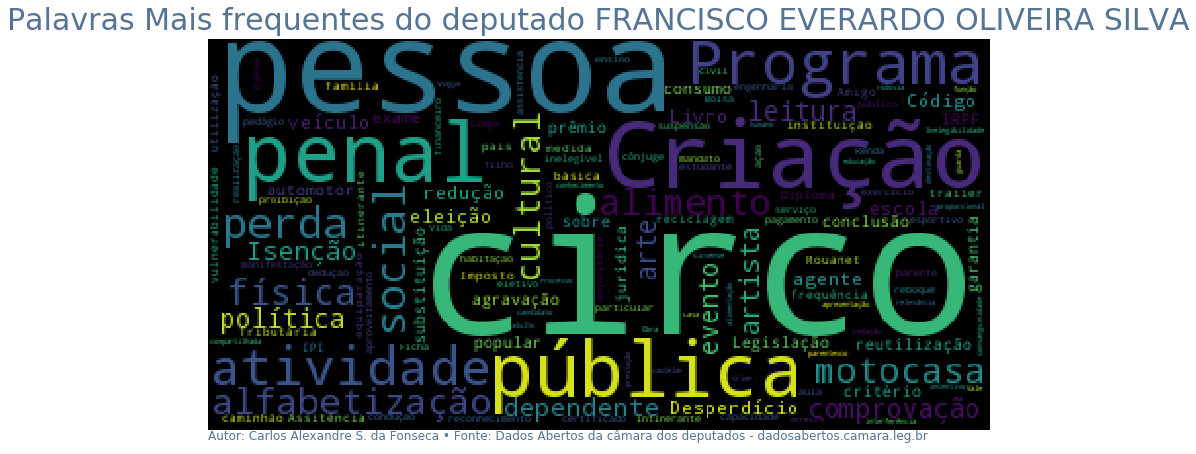

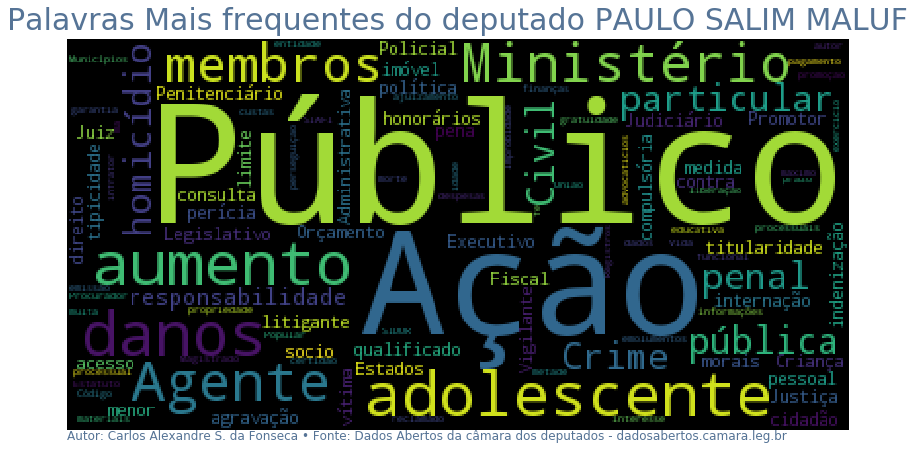

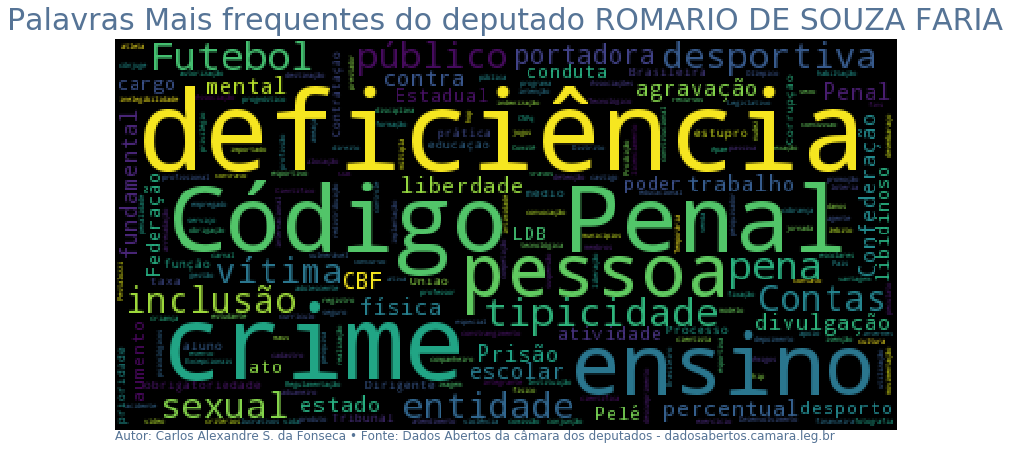

In [20]:
titulo = 'Palavras Mais frequentes do deputado {}'
info = 'Autor: Carlos Alexandre S. da Fonseca • Fonte: Dados Abertos da câmara dos deputados - dadosabertos.camara.leg.br'
fontcolor='#567496'

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

for k, v in por_deputados.items():
    if deputados_selecionados and k not in deputados_selecionados:
        continue
    try: 
        texto = ' '.join(v)
    except TypeError: 
        continue
    if not texto:
        continue
    wordcloud.generate(texto)
    titulo_fig = titulo.format(k)
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(18)
    plt.title(titulo_fig, color=fontcolor, size=30, y=1.01)
    plt.annotate(info, xy=(0, -.025), xycoords='axes fraction', fontsize=12, color=fontcolor)
    plt.imshow(wordcloud)
    plt.axis('off')
    #Ao invés de mostrar, salvar o arquivo, descomente a linhha abaixo, e comente a #plt.show()
    #plt.savefig(k+'.png')
    plt.show()
    plt.close()
    

'Autor: Carlos Alexandre S. da Fonseca • Fonte: Dados Abertos da câmara dos deputados - dadosabertos.camara.leg.br  
Projeto meu legislador